In [28]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from env import host, user, password
import acquire
import prepare
import explore

# inital data retrieval and analysis

In [2]:
telco_df=acquire.get_telco_data()

In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   internet_service_type_id    7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   gender                      7043 non-null   object 
 4   senior_citizen              7043 non-null   int64  
 5   partner                     7043 non-null   object 
 6   dependents                  7043 non-null   object 
 7   tenure                      7043 non-null   int64  
 8   phone_service               7043 non-null   object 
 9   multiple_lines              7043 non-null   object 
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection           7043 non-null   object 
 13  tech_support                7043 

In [4]:
telco_df.describe(include='object').T

,count,unique,top,freq
customer_id,7043,7043,0002-ORFBO,1
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phone_service,7043,2,Yes,6361
multiple_lines,7043,3,No,3390
online_security,7043,3,No,3498
online_backup,7043,3,No,3088
device_protection,7043,3,No,3095
tech_support,7043,3,No,3473


In [5]:
telco_df.churn

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: churn, Length: 7043, dtype: object

In [6]:
def initial_data(data):
    telco_df=acquire.get_telco_data()
    print('this data frame has',telco_df.shape[0],'rows and', telco_df.shape[1],'columns')
    print('                        ')
    print(telco_df.info())
    print('                        ')
    print(telco_df.describe())
    print('                        ')
    print(telco_df.describe(include='object').T)
    print('                        ')
    print(telco_df.columns)
    print('ended of initial report')
    print('                        ')

In [7]:
initial_data(telco_df)

this data frame has 7043 rows and 38 columns
                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   internet_service_type_id    7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   gender                      7043 non-null   object 
 4   senior_citizen              7043 non-null   int64  
 5   partner                     7043 non-null   object 
 6   dependents                  7043 non-null   object 
 7   tenure                      7043 non-null   int64  
 8   phone_service               7043 non-null   object 
 9   multiple_lines              7043 non-null   object 
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection   

# Prepare Data

In [8]:
prep_telco=prepare.prep_telco(telco_df)
prep_telco

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male
0,0002-ORFBO,0,9,65.60,593.30,One year,Yes,No,1,No,...,1,0,1,0,0,1,0,0,0,0
1,0003-MKNFE,0,9,59.90,542.40,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,1,0,0,0,0,1
2,0004-TLHLJ,0,4,73.90,280.85,Month-to-month,Yes,No,2,No,...,0,0,0,0,0,1,1,1,0,1
3,0011-IGKFF,1,13,98.00,1237.85,Month-to-month,Yes,No,2,No,...,0,0,1,0,1,1,1,1,0,1
4,0013-EXCHZ,1,3,83.90,267.40,Month-to-month,Yes,No,2,No,...,1,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,0,1,85.00,85.00,Month-to-month,Yes,Yes,2,No,...,0,0,0,0,1,1,1,1,0,0
7039,9462-MJUAW,0,4,50.40,206.60,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,0,0,1,0,0,1
7040,9705-ZJBCG,0,13,54.15,701.05,One year,Yes,No,1,Yes,...,1,0,0,0,0,0,0,0,0,0
7041,9777-IQHWP,0,64,93.40,5822.30,Two year,Yes,Yes,2,Yes,...,0,0,0,0,1,0,0,1,0,1


In [9]:
telco_train,telco_validate,telco_test=prepare.split_telco(prep_telco)
telco_train

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male
440,0643-OKLRP,1,47,80.35,3825.85,Month-to-month,Yes,Yes,2,Yes,...,0,0,0,0,0,0,1,1,0,0
67,0112-QWPNC,0,49,84.35,4059.35,One year,Yes,Yes,1,Yes,...,1,0,1,0,1,0,1,0,0,1
600,0877-SDMBN,0,54,103.95,5639.05,One year,Yes,Yes,2,Yes,...,0,0,1,0,1,1,1,1,0,0
4883,5799-JRCZO,0,63,19.50,1215.10,Two year,Yes,No,3,No internet service,...,0,1,0,1,0,0,0,0,1,0
1258,6837-BJYDQ,0,3,19.60,61.35,One year,Yes,No,3,No internet service,...,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,6296-DDOOR,0,19,58.20,1045.25,One year,Yes,No,1,No,...,0,0,1,0,0,0,0,0,0,0
817,7629-WFGLW,1,56,95.65,5471.75,One year,Yes,Yes,2,Yes,...,1,0,0,0,0,0,0,1,0,0
901,7929-DMBCV,0,20,81.00,1683.70,Month-to-month,Yes,No,2,No,...,1,0,0,0,0,1,0,1,0,0
1987,9917-KWRBE,0,41,78.35,3211.20,One year,Yes,Yes,1,Yes,...,0,0,1,0,0,1,0,0,0,0


In [10]:
telco_train.drop(columns=['internet_service_type_id.1','payment_type_id.1','contract_type_id.1'],inplace=True)
telco_validate.drop(columns=['internet_service_type_id.1','payment_type_id.1','contract_type_id.1'],inplace=True)
telco_test.drop(columns=['internet_service_type_id.1','payment_type_id.1','contract_type_id.1'],inplace=True)

In [11]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   senior_citizen                         4225 non-null   int64  
 2   tenure                                 4225 non-null   int64  
 3   monthly_charges                        4225 non-null   float64
 4   total_charges                          4225 non-null   float64
 5   contract_type                          4225 non-null   object 
 6   phone_service.1                        4225 non-null   object 
 7   multiple_lines.1                       4225 non-null   object 
 8   online_security.1                      4225 non-null   object 
 9   online_backup.1                        4225 non-null   object 
 10  device_protection.1                    4225 non-null   object 
 11  te

In [12]:
telco_train['month']=(telco_train.total_charges/telco_train.monthly_charges)
telco_validate['month']=(telco_train.total_charges/telco_train.monthly_charges)
telco_test['month']=(telco_train.total_charges/telco_train.monthly_charges)

In [13]:
telco_train.month.value_counts()

1.000000     369
0.000000      10
47.614810      1
10.542056      1
48.987976      1
            ... 
62.241049      1
8.218795       1
66.251527      1
72.676393      1
37.918164      1
Name: month, Length: 3848, dtype: int64

In [14]:
telco_train.month.value_counts().nunique()

3

In [15]:
telco_train.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'contract_type', 'phone_service.1', 'multiple_lines.1',
       'online_security.1', 'online_backup.1', 'device_protection.1',
       'tech_support.1', 'streaming_tv.1', 'streaming_movies.1',
       'paperless_billing.1', 'monthly_charges.1', 'total_charges.1',
       'signup_date', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'churn_Yes',
       'internet_service_type_Fiber optic', 'internet_ser

In [16]:
telco_train.contract_type

440     Month-to-month
67            One year
600           One year
4883          Two year
1258          One year
             ...      
1794          One year
817           One year
901     Month-to-month
1987          One year
6958          One year
Name: contract_type, Length: 4225, dtype: object

In [17]:
telco_train[telco_train.month==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,369.0,0.130081,0.336850,0.00,0.0,0.0,0.0,1.00
tenure,369.0,1.000000,0.000000,1.00,1.0,1.0,1.0,1.00
monthly_charges,369.0,50.663686,24.890105,18.85,20.9,50.1,74.1,102.45
total_charges,369.0,50.663686,24.890105,18.85,20.9,50.1,74.1,102.45
monthly_charges.1,369.0,50.663686,24.890105,18.85,20.9,50.1,74.1,102.45
partner_Yes,369.0,0.170732,0.376785,0.00,0.0,0.0,0.0,1.00
dependents_Yes,369.0,0.184282,0.388240,0.00,0.0,0.0,0.0,1.00
phone_service_Yes,369.0,0.905149,0.293407,0.00,1.0,1.0,1.0,1.00
multiple_lines_No phone service,369.0,0.094851,0.293407,0.00,0.0,0.0,0.0,1.00
multiple_lines_Yes,369.0,0.135501,0.342723,0.00,0.0,0.0,0.0,1.00


In [18]:
telco_train[telco_train.month>1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,3846.0,0.165627,0.371793,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,3846.0,35.283411,23.528402,2.000000,13.000000,34.000000,57.000000,72.000000
monthly_charges,3846.0,65.739288,30.297604,18.400000,36.062500,71.500000,90.437500,118.750000
total_charges,3846.0,2461.375000,2238.102575,31.200000,599.475000,1627.800000,4007.650000,8684.800000
monthly_charges.1,3846.0,65.739288,30.297604,18.400000,36.062500,71.500000,90.437500,118.750000
partner_Yes,3846.0,0.507800,0.500004,0.000000,0.000000,1.000000,1.000000,1.000000
dependents_Yes,3846.0,0.299012,0.457885,0.000000,0.000000,0.000000,1.000000,1.000000
phone_service_Yes,3846.0,0.900936,0.298787,0.000000,1.000000,1.000000,1.000000,1.000000
multiple_lines_No phone service,3846.0,0.099064,0.298787,0.000000,0.000000,0.000000,0.000000,1.000000
multiple_lines_Yes,3846.0,0.444098,0.496930,0.000000,0.000000,0.000000,1.000000,1.000000


In [19]:
telco_train[telco_train.month>1].describe().T==telco_train[telco_train.month==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,False,False,False,True,True,True,True,True
tenure,False,False,False,False,False,False,False,False
monthly_charges,False,False,False,False,False,False,False,False
total_charges,False,False,False,False,False,False,False,False
monthly_charges.1,False,False,False,False,False,False,False,False
partner_Yes,False,False,False,True,True,False,False,True
dependents_Yes,False,False,False,True,True,True,False,True
phone_service_Yes,False,False,False,True,True,True,True,True
multiple_lines_No phone service,False,False,False,True,True,True,True,True
multiple_lines_Yes,False,False,False,True,True,True,False,True


In [20]:
telco_train[telco_train.month==1].churn_Yes.value_counts()

1    222
0    147
Name: churn_Yes, dtype: int64

In [21]:
telco_train[telco_train.churn_Yes==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,1095.0,0.255708,0.436458,0.0,0.00000,0.000000,1.000000,1.000000
tenure,1095.0,17.214612,19.137828,1.0,2.00000,9.000000,28.000000,72.000000
monthly_charges,1095.0,74.669224,24.455831,19.1,58.80000,79.650000,94.225000,118.350000
total_charges,1095.0,1481.756986,1866.510293,19.1,131.05000,633.400000,2259.125000,8684.800000
monthly_charges.1,1095.0,74.669224,24.455831,19.1,58.80000,79.650000,94.225000,118.350000
partner_Yes,1095.0,0.350685,0.477403,0.0,0.00000,0.000000,1.000000,1.000000
dependents_Yes,1095.0,0.165297,0.371618,0.0,0.00000,0.000000,0.000000,1.000000
phone_service_Yes,1095.0,0.905023,0.293317,0.0,1.00000,1.000000,1.000000,1.000000
multiple_lines_No phone service,1095.0,0.094977,0.293317,0.0,0.00000,0.000000,0.000000,1.000000
multiple_lines_Yes,1095.0,0.453881,0.498096,0.0,0.00000,0.000000,1.000000,1.000000


In [22]:
len(telco_train[telco_train.month==1])/len(telco_train[telco_train.churn_Yes==1])

0.336986301369863

In [23]:
telco_train[telco_train.churn_Yes==0].describe().T==telco_train[telco_train.churn_Yes==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,False,False,False,True,True,True,False,True
tenure,False,False,False,False,False,False,False,True
monthly_charges,False,False,False,False,False,False,False,False
total_charges,False,False,False,False,False,False,False,False
monthly_charges.1,False,False,False,False,False,False,False,False
partner_Yes,False,False,False,True,True,False,True,True
dependents_Yes,False,False,False,True,True,True,False,True
phone_service_Yes,False,False,False,True,True,True,True,True
multiple_lines_No phone service,False,False,False,True,True,True,True,True
multiple_lines_Yes,False,False,False,True,True,True,True,True


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


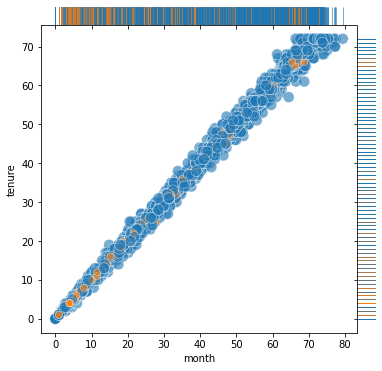

In [24]:
g=sns.JointGrid(data=telco_train, x="month", y="tenure", space=0, ratio=17,hue='churn_Yes')
g.plot_joint(sns.scatterplot, size=telco_train["churn_Yes"], sizes=(50, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


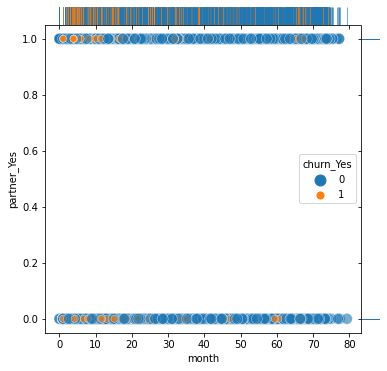

In [25]:
g=sns.JointGrid(data=telco_train, x="month", y="partner_Yes", space=0, ratio=17,hue='churn_Yes')
g.plot_joint(sns.scatterplot, size=telco_train["churn_Yes"], sizes=(50, 120),
             color="g", alpha=.6, legend=True)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)


In [40]:
telco_train_m=telco_train[telco_train.month<=1]
telco_train_m[telco_train_m.churn_Yes==1].describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,222.0,0.198198,0.399543,0.0,0.0000,0.0,0.00,1.00
tenure,222.0,1.000000,0.000000,1.0,1.0000,1.0,1.00,1.00
monthly_charges,222.0,58.196396,24.142377,19.1,39.7625,69.3,78.35,102.45
total_charges,222.0,58.196396,24.142377,19.1,39.7625,69.3,78.35,102.45
monthly_charges.1,222.0,58.196396,24.142377,19.1,39.7625,69.3,78.35,102.45
partner_Yes,222.0,0.202703,0.402921,0.0,0.0000,0.0,0.00,1.00
dependents_Yes,222.0,0.162162,0.369432,0.0,0.0000,0.0,0.00,1.00
phone_service_Yes,222.0,0.882883,0.322286,0.0,1.0000,1.0,1.00,1.00
multiple_lines_No phone service,222.0,0.117117,0.322286,0.0,0.0000,0.0,0.00,1.00
multiple_lines_Yes,222.0,0.166667,0.373520,0.0,0.0000,0.0,0.00,1.00


In [41]:
telco_train_m[telco_train_m.churn_Yes==1].contract_type.value_counts()

Month-to-month    222
Name: contract_type, dtype: int64

In [42]:
222/688

0.3226744186046512